# Final Project - Team Monarch 2.0
## SDM Visualization

#### An interactive system to display species distribution models along with animated gifs for each species (to show migration patterns) and biodiversity maps of North American butterflies.

## Requirements

#### The widgets displayed in the system may not show up in your Jupyter Notebook without first installing ipywidgets and enabling the extensions. Use the commands listed below to install ipywidgets and enable extensions:
```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
OR
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

## Setup

In [13]:
# Import required libraries.

import glob, os
import imageio
import ipywidgets as wg
import matplotlib.pyplot as plt

from PIL import Image as im
from IPython.display import Image
from IPython.display import display
from PIL import ImageFont, ImageDraw 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

## Interactive GUI (User Input)

### Single SDM + Animated SDM Display

#### The output shows the expected SDM along with 9 possible animations of the species' SDMs over all the months for each algorithm/prediction threshold combination.

#### Usage: Enter name of species, algorithm, prediction threshold, month and animation speed preference.

#### Note: When the input values to the GUI are changed, there is no need to press Enter. Once the next cell is executed, the values in the GUI are registered and appropriately saved.

In [14]:
# Set initial style of the interactive GUI.

style = {'description_width': 'initial'}

# Initialize the elements of the GUI.

name = wg.Text(value='Name', description="Species: ", style=style)
algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ", style=style)
threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction Threshold: ", style=style)
month = wg.SelectionSlider(description="Month: ", options=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all'], style=style)
speed = wg.FloatSlider(value=.5,min=0,max=1.0,step=0.1,description='Animation Speed:',style=style)

# Display the GUI.

display(name, algo, threshold, month, speed)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

#### The following code block displays SDM maps for the user entered input. 

----------------------------------------
Species:  Papilio_glaucus
Algorithm:  CTA
Prediction Threshold:  1
Month:  jan
----------------------------------------


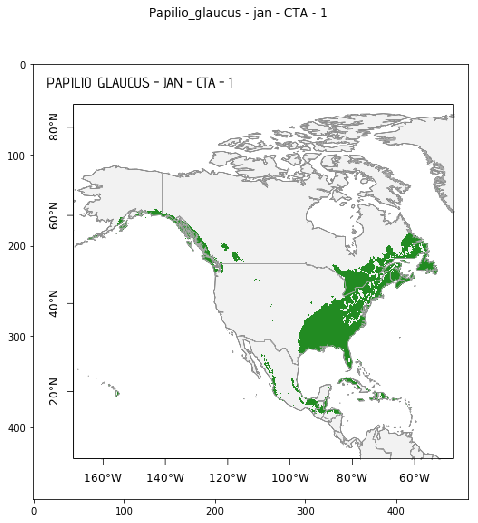

In [15]:
# Initialize the filename for each SDM.

filename = "./SDMs/" + name.value + "/" + month.value + "/" + algo.value + "-" + threshold.value + ".png"

# Check for file existence and then display the map (with a title).

if os.path.isfile(filename):
    print('----------------------------------------')
    print('Species: ', name.value)
    print('Algorithm: ', algo.value)
    print('Prediction Threshold: ', threshold.value)
    print('Month: ', str(month.value))
    print('----------------------------------------')
    img = im.open(filename)
    fig = plt.figure()
    fig.set_size_inches(14, 8, forward=True)
    fig.suptitle(name.value + ' - ' + month.value + ' - '+ algo.value + ' - ' + threshold.value)
    plt.imshow(img)
    plt.show(img)

#### The following code block displays animated SDM maps of the species over all the months for each algorithm/prediction threshold combination (upto 9 maximum).

#### Note: No input required from the user. Code assumes the species to be the same from the GUI and displays all the animated SDM maps available for that particular species.

In [16]:
# Initialize dicts for looping.

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all']
algos = ["CTA", "GLM", "RF"]
thresholds = ['1', '10', '50']
c = 0

# Create 'gifs' directory if not already created.

if not os.path.exists('gifs/'):
    os.makedirs('gifs/')

# Loop through SDM maps of a particular species to generate animated gifs of each possible algorithm/prediction threshold combination.

for algo in algos:
    for threshold  in thresholds:
        images = []
        for month in months:
            filename = "./SDMs/" + name.value + "/" + month + "/" + algo + "-" + threshold + ".png"
            if os.path.isfile(filename):
                img = im.open(filename)
                draw = ImageDraw.Draw(img)
                draw.rectangle(((0, 0), (250, 40)), fill="white")
                font = ImageFont.truetype("fonts/adventpro.ttf", 16)
                draw.text((15, 10),name.value.upper() + ' - ' + month.upper() + ' - ' + algo + ' - ' + threshold,(0,0,0),font=font)
                img.save(filename)
                images.append(imageio.imread(filename))
        if len(images) > 0:
            c = c+1
            if c==1:
                print('----------------------------------------')
                print('Species: ', name.value)
                print('----------------------------------------')
            imageio.mimsave('gifs/' + name.value + '-' + algo + '-' + threshold + '.gif', images, duration=speed.value)
            display(Image(url = 'gifs/' + name.value + '-' + algo + '-' + threshold + '.gif', width = 400))

----------------------------------------
Species:  Papilio_glaucus
----------------------------------------


### Stack SDM DIsplay

#### The output shows the expected biodiversity map of North American butterflies for a particular algorithm/prediction threshold combination.

#### Usage: Enter algorithm and prediction threshold.

#### Note: When the input values to the GUI are changed, there is no need to press Enter. Once the next cell is executed, the values in the GUI are registered and appropriately saved.

In [17]:
# Initialize elements of the stack SDM GUI.

stack_algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ", style=style)
stack_threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction Threshold: ", style=style)

# Display stack SDM GUI.

display(stack_algo, stack_threshold)

A Jupyter Widget

A Jupyter Widget

In [18]:
# Initialize the filename for each SDM.

filename = "./Stack/" + stack_algo.value + "-" + stack_threshold.value + ".png"

# Check for file existence and then display the map (with a title).

if os.path.isfile(filename):
    print('----------------------------------------')
    print('Algorithm: ', stack_algo.value)
    print('Prediction Threshold: ', stack_threshold.value)
    print('----------------------------------------')
    img = im.open(filename)
    fig = plt.figure()
    fig.set_size_inches(14, 8, forward=True)
    fig.suptitle(algo.value + threshold.value)
    plt.imshow(img)
    plt.show(img)